## The effect of the _"Black Lives Matter"_ movement on the arrestation of African American people in L.A.

____

### Context _(TODO)_

...

Black Lives Matter movement created in July, 2013
___

### The data _(TODO)_

- Where it was acquired
- Explanation of each column

___

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

arrest_data = pd.read_csv('arrest-data-from-2010-to-present.csv', error_bad_lines = False)

Now that we've loaded our data, let's have a sneak peek at our dataframe

In [2]:
arrest_data.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Charge Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,5666847,2019-06-22T00:00:00.000,1630.0,14,Pacific,1457,44,M,W,24.0,...,VANDALISM,12300 CULVER BL,NaN,"{'latitude': '33.992', 'human_address': '{""add...",24031.0,918.0,1137.0,10.0,10.0,85.0
1,5666688,2019-06-22T00:00:00.000,1010.0,10,West Valley,1061,8,M,O,NaN,...,NaN,19000 VANOWEN ST,NaN,"{'latitude': '34.1687', 'human_address': '{""ad...",19339.0,321.0,1494.0,NaN,4.0,10.0
2,5666570,2019-06-22T00:00:00.000,400.0,15,N Hollywood,1543,31,F,O,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,MAGNOLIA AV,LAUREL CANYON BL,"{'latitude': '34.1649', 'human_address': '{""ad...",8890.0,205.0,1332.0,17.0,5.0,39.0
3,5666529,2019-06-22T00:00:00.000,302.0,17,Devonshire,1738,23,F,W,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,HAYVENHURST ST,N REGAN FY,"{'latitude': '34.2692', 'human_address': '{""ad...",19329.0,69.0,388.0,NaN,2.0,78.0
4,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,OBSTRUCT/RESIST EXECUTIVE OFFICER,6600 ESPLANADE ST,NaN,"{'latitude': '33.9609', 'human_address': '{""ad...",25075.0,937.0,241.0,10.0,10.0,16.0


For our analysis, it is not important to keep all columns. Only the ones regarding the race, the date of the arrest, the gender and the type of arrest (i.e. infraction or felony) are of interest to us.

In [3]:
#Picking the necessary columns and renaming them
arrest_data = arrest_data[['Arrest Date', 'Sex Code', 'Descent Code', 'Arrest Type Code']] \
                .rename(columns = {'Arrest Date' : 'Date', 'Sex Code': 'Gender', 'Descent Code': 'Race', 
                                   'Arrest Type Code': 'Arrest Type'})


#Date --> DateTime
arrest_data['Date'] = pd.to_datetime(arrest_data['Date'], errors='coerce')

#Verifying that no date is 'NaT' (Not a Time)
assert(arrest_data.Date.isnull().sum() == 0)

#Sanity checks
assert(datetime.datetime(2010,1,1) == min(arrest_data.Date))
assert(datetime.datetime(2019,6,22) == max(arrest_data.Date))

arrest_data.head()

,Date,Gender,Race,Arrest Type
0,2019-06-22,M,W,M
1,2019-06-22,M,O,O
2,2019-06-22,F,O,M
3,2019-06-22,F,W,M
4,2019-06-22,M,W,F


___

### Question 1

_Since the creation of the Black Lives Matter movement, was there a change in the trend of the overall arrests of African American people in L.A.?_

Let's start by looking at the number of arrests per race, just to get an idea of what that looks like

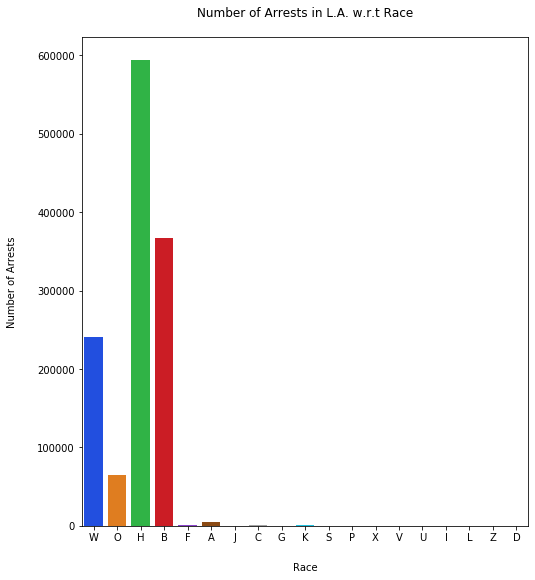

Number of Black people arrested (2010-2019) :  367152
Percentage: 28.77%

Number of Hispanic people arrested (2010-2019) : 594321
Percentage: 46.571%

Number of White people arrested (2010-2019) : 240451
Percentage: 18.842%

Number of Others people arrested (2010-2019) : 65426
Percentage: 5.127%



In [4]:
race_data = arrest_data[['Date', 'Race']]

fig = plt.figure(figsize=(8,9))
ax = plot = sns.countplot(x='Race', data= race_data, palette = 'bright')
plt.title("Number of Arrests in L.A. w.r.t Race", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Race', labelpad = 20)
plt.show()

#Getting count for each race that has a high number of arrests (> 5%)
counts = race_data.Race.value_counts()
black_counts = counts['B']
hispanic_counts = counts['H']
white_counts = counts['W']
others_counts = counts['O']

print('Number of Black people arrested (2010-2019) :  ' + str(black_counts))
print('Percentage: ' + str(round(black_counts/len(arrest_data)*100,3)) + "%\n")
print('Number of Hispanic people arrested (2010-2019) : ' + str(hispanic_counts))
print('Percentage: ' + str(round(hispanic_counts/len(arrest_data)*100,3)) + "%\n")
print('Number of White people arrested (2010-2019) : ' + str(white_counts))
print('Percentage: ' + str(round(white_counts/len(arrest_data)*100,3)) + "%\n")
print('Number of Others people arrested (2010-2019) : ' + str(others_counts))
print('Percentage: ' + str(round(others_counts/len(arrest_data)*100,3)) + "%\n")


We can already see that there is quite a decrepency in the number of arrests w.r.t the gender.

Now, let's look at how the creation of the Black Lives Matter movement affected the number of arrest. We will by counting the number of African American people arrested before and after July, 2013 (from January 2010 to December 2016, i.e. 3.5 years before and after the creation of the black lives matter)

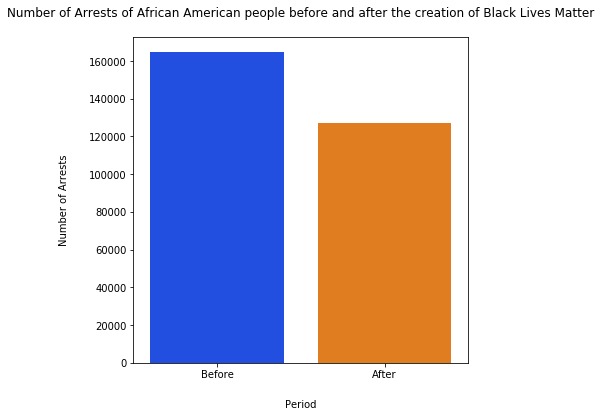

In [5]:
black_data = race_data[race_data['Race'] == 'B']
movement_creation_date = datetime.datetime(2013, 8, 1)
black_before_movement = black_data[black_data['Date'] < movement_creation_date].assign(Period = "Before")
black_after_movement = black_data[(black_data['Date'] >= movement_creation_date) & 
                                  (black_data['Date'] <= datetime.datetime(2016,12,31))].assign(Period = "After")

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Period', data= pd.concat([black_before_movement, black_after_movement]), palette = 'bright')
plt.title("Number of Arrests of African American people before and after the creation of Black Lives Matter", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Period', labelpad = 20)
plt.show()


At first glance, it would seem that the creation of the Black Lives Matter movment had a clear impact on the number of arrests of people of African American descent.  

In [6]:
print('Number of Arrests Before : ' + str(len(black_before_movement)))
print('Number of Arrests After  : ' + str(len(black_after_movement)))
print('Decrease percentage : ' + str(round((len(black_before_movement)- len(black_after_movement))/len(black_before_movement)*100,2)) + "%")

Number of Arrests Before : 164679
Number of Arrests After  : 127028
Decrease percentage : 22.86%


Analysis of the arrests trends per month --> segmented regression

In [7]:
black_trends_before = black_before_movement.set_index('Date') \
                        .replace('B', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'Before')

black_trends_after = black_after_movement.set_index('Date') \
                        .replace('B', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'After')

black_trends = pd.concat([black_trends_before, black_trends_after]).reset_index(drop = True)
black_trends['Time'] = black_trends.index + 1

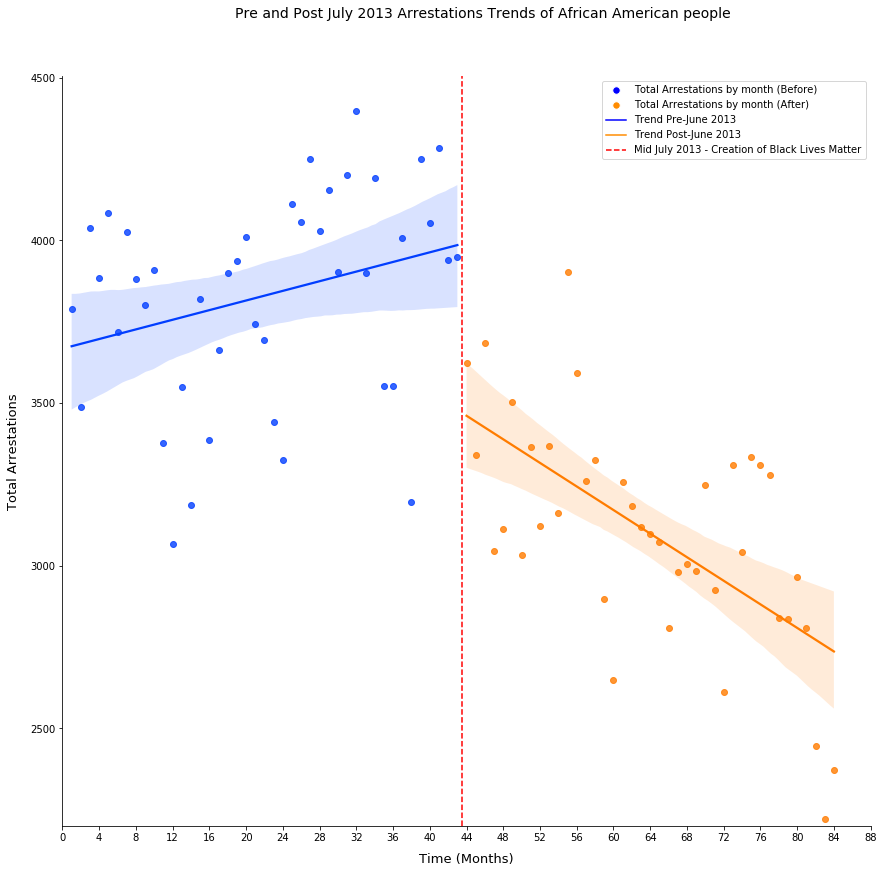

In [8]:
from matplotlib.lines import Line2D
#Showing the results of the segmented linear regression
ax = sns.lmplot(x="Time", y="Arrestations", hue = "Period", data=black_trends, ci=95, palette="bright", height = 12)
ax._legend.remove()
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Pre and Post July 2013 Arrestations Trends of African American people', fontsize = 14)
ax.set_axis_labels("Time (Months)", "Total Arrestations", fontsize = 13, labelpad = 10)
plt.axvline(x = 43.5, color = 'red', alpha = 2, linestyle = '--')
plt.xlim(0, 86)
plt.ylim(2200, None)
ax.set(xticks = range(0, 92, 4))
#Constructing the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Total Arrestations by month (Before)', markerfacecolor='blue', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations by month (After)', markerfacecolor='darkorange', markersize=7.5),
                   Line2D([0], [0], color='blue', label = "Trend Pre-June 2013"), 
                   Line2D([0], [0], color='darkorange', label = "Trend Post-June 2013"), 
                   Line2D([0], [0], color='red', linestyle = '--', alpha = 2 , label = "Mid July 2013 - Creation of Black Lives Matter")]

plt.legend(handles=legend_elements)


plt.show()

Numerical Segmented regression

In [9]:
import statsmodels.api as sm
black_trends['x2'] = black_trends['Period'].apply(lambda x : 0 if x == 'Before' else 1)
black_trends['x3'] = black_trends['Time'].apply(lambda x : x-43 if x>43 else 0)
y_df = black_trends['Arrestations']
black_trends = black_trends.drop(columns = ['Arrestations','Period']).rename(columns = {'Time':'x1'})
black_trends

,x1,x2,x3
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
...,...,...,...
79,80,1,37
80,81,1,38
81,82,1,39
82,83,1,40


In [10]:
X_df = black_trends
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     51.87
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.01e-18
Time:                        06:48:01   Log-Likelihood:                -594.65
No. Observations:                  84   AIC:                             1197.
Df Residuals:                      80   BIC:                             1207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3666.8372     91.349     40.141      0.000    3485.048    3848.627
x1             7.4049      3.617      2.048      0.044       0.208      14.602
x2          -506.5804    128.642     -3.938      0.000    -762.587    -250.574
x3           -25.5202      5.307     -4.808      0.000     -36.082     -14.958
==============================================================================
Omnibus:                        2.788   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.733
Skew:                          -0.427   Prob(JB):                        0.255
Kurtosis:                       2.772   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

### Question 3

Is there a difference in the number of arrestations between males and females African Americans ? What about after the Black Lives Matter movement ?

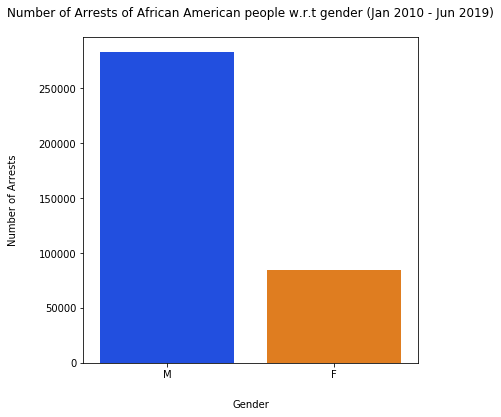

In [11]:
gender_black_data = arrest_data[arrest_data['Race'] == 'B'][['Date', 'Gender']].reset_index(drop = True)

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Gender', data=gender_black_data, palette = 'bright')
plt.title("Number of Arrests of African American people w.r.t gender (Jan 2010 - Jun 2019)", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Gender', labelpad = 20)
plt.show()

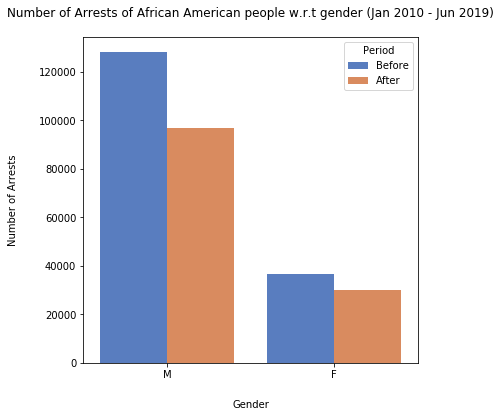

In [12]:
gender_black_data['Period'] = gender_black_data['Date'].apply(lambda x: 'Before' if x <= movement_creation_date else 'After')
gender_black_data = gender_black_data[gender_black_data['Date'] <= datetime.datetime(2016,12,31)].reset_index(drop = True).sort_values(by='Date')

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Gender', hue = 'Period',data=gender_black_data, palette = 'muted')
plt.title("Number of Arrests of African American people w.r.t gender (Jan 2010 - Jun 2019)", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Gender', labelpad = 20)
plt.show()

Segmented regression analysis

In [13]:
female_black_data = gender_black_data[gender_black_data['Gender'] == 'F'] \
                    .set_index('Date') \
                    .replace('F', 1) \
                    .rename(columns = {'Gender' : 'Arrestations'}) \
                    .groupby(pd.Grouper(freq = 'M')).sum() \
                    .reset_index() \
                    .sort_values(by = 'Date')

female_black_data_before = female_black_data[female_black_data['Date'] < datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'Before Female') \
                            .assign(Time = lambda x : x.index + 1)

female_black_data_after = female_black_data[female_black_data['Date'] >= datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'After Female') \
                            .assign(Time = lambda x : x.index + 1)


male_black_data = gender_black_data[gender_black_data['Gender'] == 'M'] \
                    .set_index('Date') \
                    .replace('M', 1) \
                    .rename(columns = {'Gender' : 'Arrestations'}) \
                    .groupby(pd.Grouper(freq = 'M')).sum() \
                    .reset_index() \
                    .sort_values(by = 'Date')

male_black_data_before = male_black_data[male_black_data['Date'] < datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'Before Male') \
                            .assign(Time = lambda x : x.index + 1)

male_black_data_after = male_black_data[male_black_data['Date'] >= datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'After Male') \
                            .assign(Time = lambda x : x.index + 1)

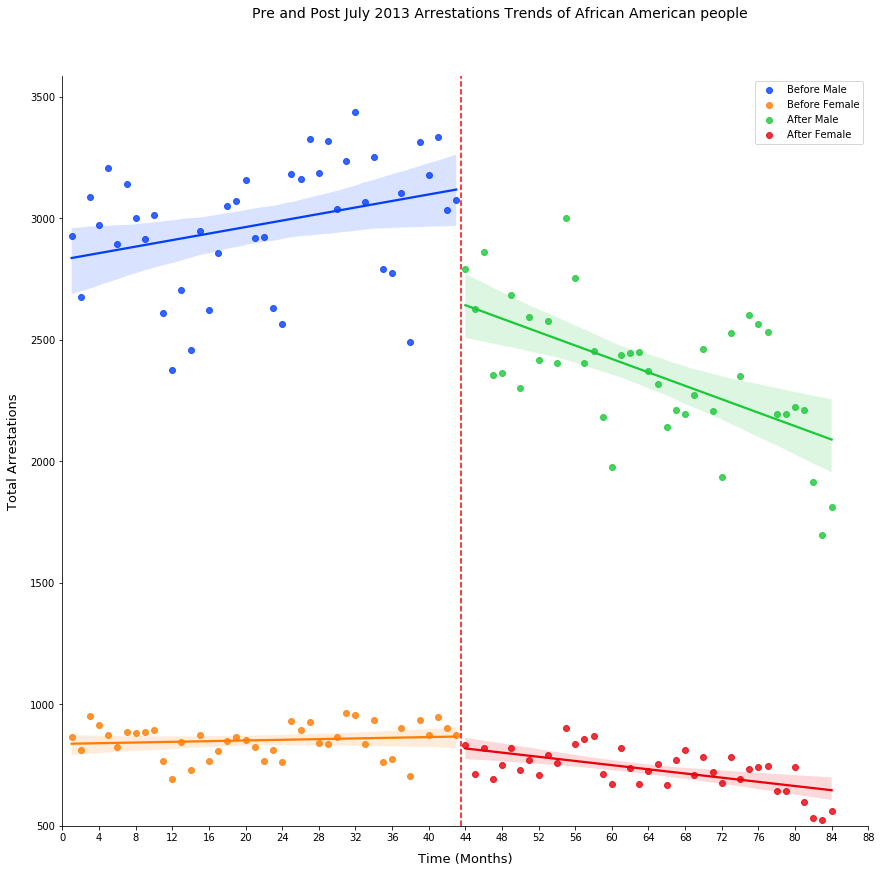

In [14]:
ax = sns.lmplot(x="Time", y="Arrestations", hue = "Period", data=pd.concat([male_black_data_before, female_black_data_before, male_black_data_after, female_black_data_after]),
                ci=95, palette="bright", height = 12)

plt.subplots_adjust(top=0.9)
ax._legend.remove()
ax.fig.suptitle('Pre and Post July 2013 Arrestations Trends of African American people', fontsize = 14)
ax.set_axis_labels("Time (Months)", "Total Arrestations", fontsize = 13, labelpad = 10)
plt.axvline(x = 43.5, color = 'red', alpha = 2, linestyle = '--')
plt.xlim(0, 86)
plt.ylim(500, None)
ax.set(xticks = range(0, 92, 4))

plt.legend()


plt.show()

Male Segmented regression

In [15]:
male_trends = pd.concat([male_black_data_before, male_black_data_after])
male_trends['x2'] = male_trends.Period.apply(lambda x : 0 if x=='Before Male' else 1)
male_trends['x3'] = male_trends.Time.apply(lambda x: x-43 if x>43 else 0)
y_df = male_trends['Arrestations']
male_trends = male_trends.drop(columns = ['Date', 'Period', 'Arrestations']).rename(columns = {'Time':'x1'})

In [16]:
X_df = male_trends
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     54.80
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           2.37e-19
Time:                        06:48:04   Log-Likelihood:                -576.49
No. Observations:                  84   AIC:                             1161.
Df Residuals:                      80   BIC:                             1171.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2829.7342     73.587     38.454      0.000    2683.291    2976.178
x1             6.7045      2.913      2.301      0.024       0.907      12.502
x2          -461.9618    103.630     -4.458      0.000    -668.192    -255.731
x3           -20.5252      4.275     -4.801      0.000     -29.034     -12.017
==============================================================================
Omnibus:                        2.144   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                2.138
Skew:                          -0.366   Prob(JB):                        0.343
Kurtosis:                       2.727   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
female_trends = pd.concat([female_black_data_before, female_black_data_after])
female_trends['x2'] = female_trends.Period.apply(lambda x : 0 if x=='Before Female' else 1)
female_trends['x3'] = female_trends.Time.apply(lambda x: x-43 if x>43 else 0)
y_df = female_trends['Arrestations']
female_trends = female_trends.drop(columns = ['Date', 'Period', 'Arrestations']).rename(columns = {'Time':'x1'})

In [18]:
X_df = female_trends
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     28.21
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.51e-12
Time:                        06:48:04   Log-Likelihood:                -473.72
No. Observations:                  84   AIC:                             955.4
Df Residuals:                      80   BIC:                             965.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        837.1030     21.651     38.663      0.000     794.016     880.190
x1             0.7004      0.857      0.817      0.416      -1.005       2.406
x2           -44.6187     30.491     -1.463      0.147    -105.297      16.060
x3            -4.9950      1.258     -3.971      0.000      -7.498      -2.492
==============================================================================
Omnibus:                        3.777   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.715
Skew:                          -0.284   Prob(JB):                        0.257
Kurtosis:                       2.326   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""